<a href="https://colab.research.google.com/github/Prachivats17/Prachivats17/blob/Prachivats17-patch-1/cats_vs_dogs17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
import tensorflow as ts
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout



In [ ]:
# generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# normalize
def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label

  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)


In [ ]:
# create CNN model

model= Sequential()



model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
istory =model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 65s 103ms/step - loss: 0.0443 - accuracy: 0.9848 - val_loss: 0.6342 - val_accuracy: 0.8322
Epoch 2/10
625/625 [==============================] - 66s 104ms/step - loss: 0.0516 - accuracy: 0.9825 - val_loss: 1.0053 - val_accuracy: 0.8256
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.0384 - accuracy: 0.9876 - val_loss: 0.7044 - val_accuracy: 0.8156
Epoch 4/10
625/625 [==============================] - 64s 101ms/step - loss: 0.0707 - accuracy: 0.9758 - val_loss: 0.8424 - val_accuracy: 0.8070
Epoch 5/10
625/625 [==============================] - 63s 101ms/step - loss: 0.0354 - accuracy: 0.9884 - val_loss: 0.9440 - val_accuracy: 0.8146
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.0254 - accuracy: 0.9916 - val_loss: 1.6146 - val_accuracy: 0.7894
Epoch 7/10
625/625 [==============================] - 63s 101ms/step - loss: 0.0256 - accuracy: 0.9916 - val_loss: 0.7866 - val_ac

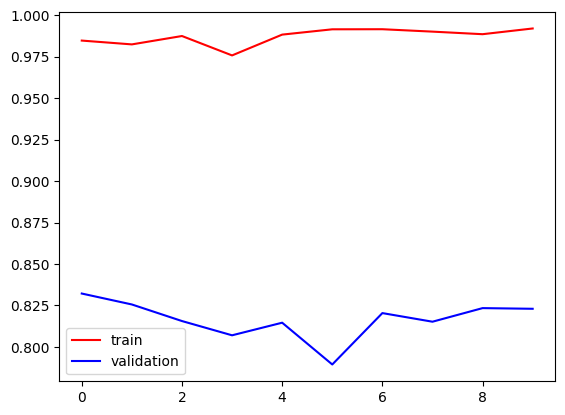

In [ ]:
import matplotlib.pyplot as plt

plt.plot(istory.history['accuracy'],color='red',label='train')
plt.plot(istory.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


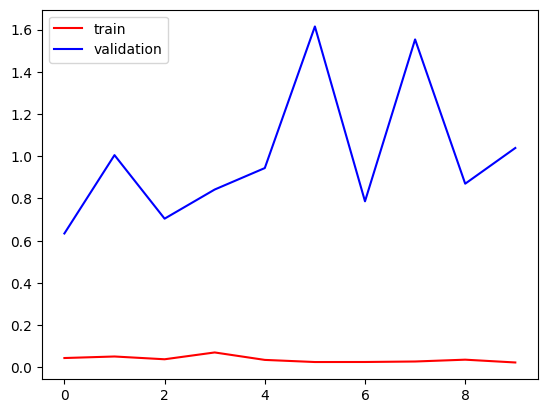

In [ ]:
plt.plot(istory.history['loss'],color='red',label='train')
plt.plot(istory.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity



In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/dog.10.jpg')

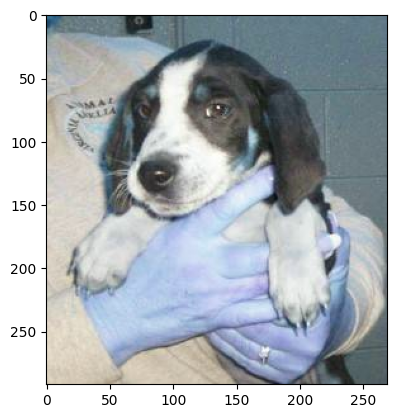

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(292, 269, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape((1,256,256,3))


In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 407ms/step


array([[0.8389788]], dtype=float32)